<a href="https://colab.research.google.com/github/Sharens/python/blob/main/Financial_Crisis-2007-2009-USAvsPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kryzys ekonomiczny w Stanach Zjednoczonych w latach 2007-2009 i jego wpływ na polską gospodarkę


# Slajd #1 Wstęp
**Tło historyczne:**

Ogólnoświatowy kryzys gospodarczy na rynkach finansowych i bankowych, którego szczyt przypadł na lata 2008–2009, zapoczątkowany zapaścią na rynku pożyczek hipotecznych wysokiego ryzyka w Stanach Zjednoczonych.

Bezpośrednią przyczyną załamywania się funkcjonowania światowego systemu finansowego od połowy 2007 r. była hossa na rynku kredytów hipotecznych, których udzielały banki w Stanach Zjednoczonych przy wysokim ryzyku spłaty osobom o niewystarczających możliwościach finansowych (ang. subprime mortgage). Kredyty te stały się zabezpieczeniem obligacji strukturyzowanych masowo sprzedawanych w celach inwestycyjnych i spekulacyjnych przez prywatne instytucje finansowe, w tym największe banki amerykańskie i europejskie. Świadomość ryzykowności tych obligacji była niewielka, gdyż trwał wzrost na rynku nieruchomości, a czołowe instytucje ratingowe wystawiały wysokie oceny bezpieczeństwa rzeczonym obligacjom. Niewypłacalność indywidualna z niespodziewanie dużym odsetkiem (9,2%) poskutkowała z kolei brakiem gotówki na rynku kredytowym i niestabilnością (zagrożeniem rychłej niewypłacalności wierzytelności) tych instytucji.

Innymi przyczynami było powszechne wykorzystywanie sekurytyzacji i derywatów kredytowych do dystrybucji ryzyka i znaczny udział w transakcjach rynkowych wyłączonego spod nadzoru, alternatywnego systemu bankowego (shadow banking system).

Źródło: https://pl.wikipedia.org/wiki/Kryzys_finansowy_(2007–2009) 

**Autor:** Konrad Gwóźdź


**Teza:**


1.   Kryzys spowodował wzrost bezrobocia i spadek PKB w Stanach Zjednoczonych
2.   Polska nie odczuła kryzysu tak dotkliwie jak Stany Zjednoczone


Analiza powstała w oparciu o [dane udostępnione przez Bank światowy](https://www.worldbank.org/en/home), w analizie wykorzystano głównie wskaźniki ekonomiczne oraz społeczne.

# Wyjaśnienie niektórych pojęć:
**PKB per Capita**

Jest to iloraz wartości produktu krajowego brutto i liczby mieszkańców kraju. Miernik ten stosuje się do przybliżonego określenia poziomu życia obywateli danego państwa i umożliwia porównanie poziomu życia z tym w innych krajach.




In [ ]:
#@title #Importowanie bibliotek

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

In [ ]:
#@title Łączenie z gdrivem
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [ ]:
#@title #Odczytywanie danych
df_data = pd.read_csv('WDIData.csv')
df_country = pd.read_csv('WDICountry.csv')
df_series = pd.read_csv('WDISeries.csv')

sns.set(rc = {'figure.figsize':(20,10)})

df_data = df_data.drop('Unnamed: 65', axis = 1)
df_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,15.981256,16.320475,16.643243,16.994695,17.313168,17.604950,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,28.381836,32.224027,32.046478,31.323579,33.312163,38.380433,39.754201,42.168241,43.640661,NaN
2,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,15.295950,20.525353,19.461383,17.790698,16.553470,23.907897,24.624725,26.813900,28.841150,NaN
3,Africa Eastern and Southern,AFE,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,65.470615,66.303599,66.496010,65.828988,66.926692,68.722184,71.085418,71.994933,73.589886,NaN
4,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#@title Reorganizacja danych
    
#Organizacja danych dla USA
usa_country = df_data[df_data['Country Code'] == 'USA']
usa_country_y = usa_country.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name = 'Year', value_name = 'Value')

usa_country_y['Year'] = pd.to_numeric(usa_country_y['Year'])
usa_country_y['Value'] = pd.to_numeric(usa_country_y['Value']) 

#Organizacja danych dla PL

pl_country = df_data[df_data['Country Code'] == 'POL']
pl_country_y = pl_country.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name = 'Year', value_name = 'Value')

pl_country_y['Year'] = pd.to_numeric(pl_country_y['Year'])
pl_country_y['Value'] = pd.to_numeric(pl_country_y['Value']) 

years = [1990, 1991, 1992, 1993, 1994, 1995,
         1996, 1997, 1998, 1999, 2000, 2001, 
         2002, 2003, 2004, 2005, 2006, 2007, 
         2008, 2009, 2010, 2011, 2012, 2013, 
         2014, 2015]


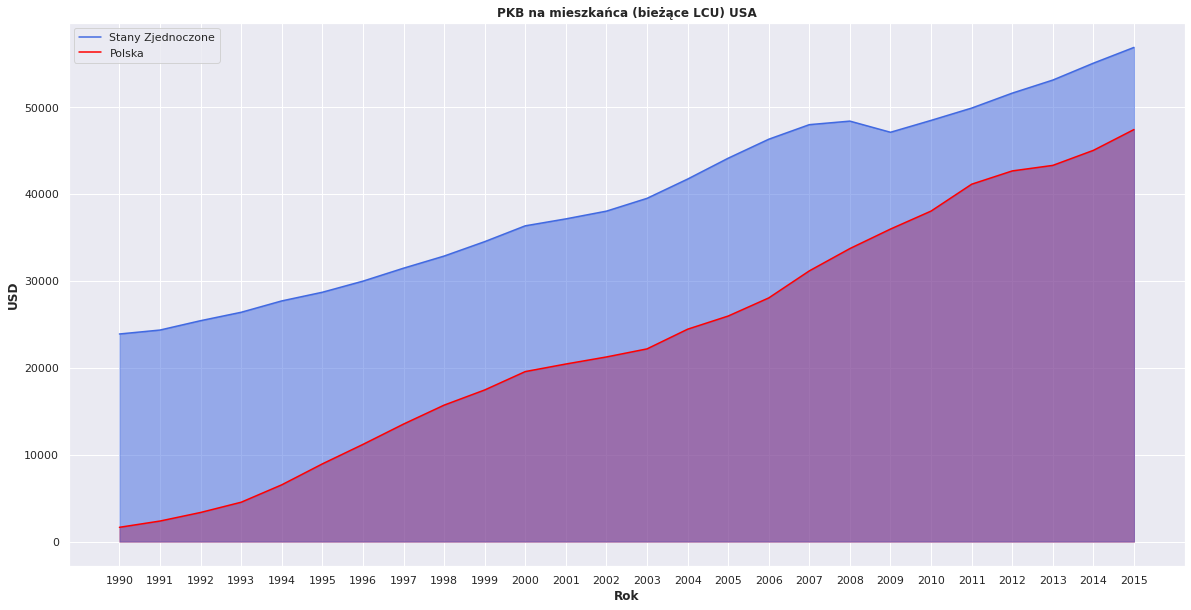

In [ ]:
# @title Slajd #2 PKB na mieszkańca (bieżące LCU)
indicator_lineplot = ['GDP per capita (current LCU)']
lineplot_data = usa_country_y.loc[usa_country_y['Year'].isin(years) & usa_country_y['Indicator Name'].isin(indicator_lineplot)]
lineplot_01 = sns.lineplot(data = lineplot_data, x = 'Year', y = 'Value', color = 'royalblue')
lineplot_01.set_xticks(years)



indicator_lineplot_pl = ['GDP per capita (current LCU)']
lineplot_data_pl = pl_country_y.loc[pl_country_y['Year'].isin(years) & pl_country_y['Indicator Name'].isin(indicator_lineplot_pl)]
pkb_chart_pl =sns.lineplot(data = lineplot_data_pl, x = 'Year', y = 'Value', color = 'red')
pkb_chart_pl .set_xticks(years)


plt.fill_between(years, lineplot_data_pl['Value'], color = 'red', alpha = 0.5)
plt.fill_between(years, lineplot_data ['Value'], color = 'royalblue', alpha = 0.5)

pkb_chart_pl.legend(['Stany Zjednoczone', 'Polska'])

plt.xlabel('Rok', fontweight = 'bold')
plt.ylabel("USD", fontweight = 'bold')
plt.title('PKB na mieszkańca (bieżące LCU) USA', fontweight = 'bold')

plt.show()

Na podstawie powyższego wykresu, możemy zauważyć że kryzys nie miał znaczącego wpływu na wskaźnik **PKB na mieszkańca (bieżące LCU)** dla obu państw.

Zauważalny jest, lekki spadek PKB w roku 2009 dla USA, jednak nie miało to wiekszych skutków w przyszłości.

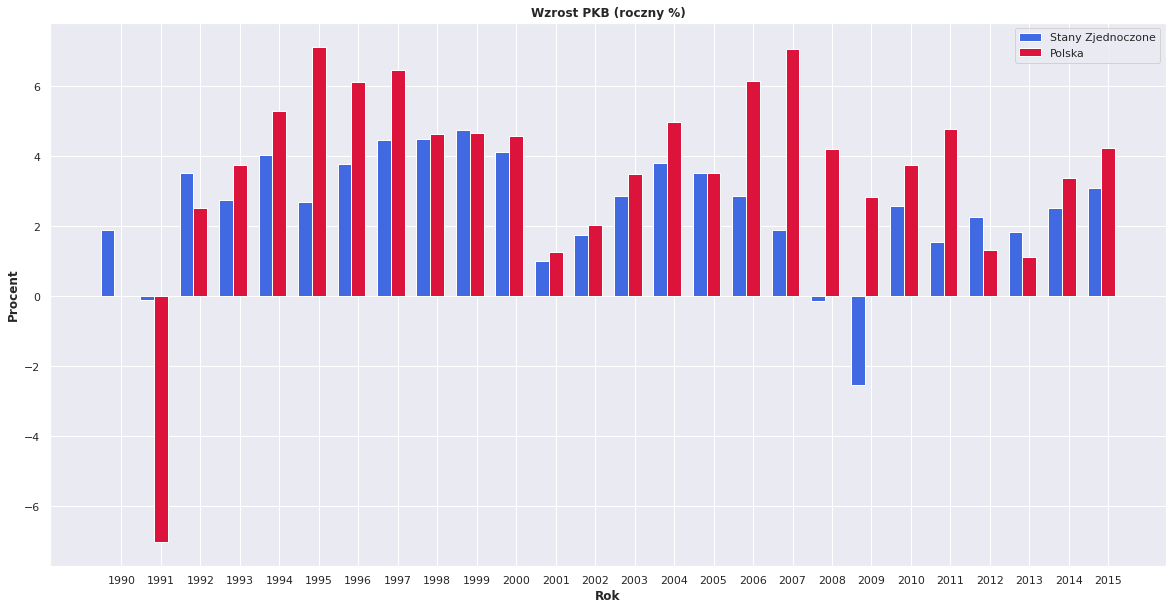

In [ ]:
#@title Slajd #3  Wzrost PKB (roczny %)
indicator_2 = ['GDP growth (annual %)']
lineplot_2_data = usa_country_y.loc[usa_country_y['Year'].isin(years) & usa_country_y['Indicator Name'].isin(indicator_2)]
lineplot_2_data_pl = pl_country_y.loc[pl_country_y['Year'].isin(years) & pl_country_y['Indicator Name'].isin(indicator_2)]
"""
#usa
lineplot_2 = sns.barplot(data = lineplot_2_data, x = 'Year', y = 'Value',  color = 'royalblue', alpha = 0.5)
lineplot_2.set_title('Wzrost PKB (roczny %)')
lineplot_2.set_xticks(years)
plt.ylabel("Procent")
plt.xlabel("Rok")

#polska

lineplot_2_pl = sns.barplot(data = lineplot_2_data_pl, x = 'Year', y = 'Value', color = 'red', alpha = 0.5)

lineplot_2.legend(['Stany Zjednoczone', 'Polska'])
"""

barWidth = 0.35

bars1 = lineplot_2_data['Value']
bars2 = lineplot_2_data_pl['Value']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, width = barWidth, color = 'royalblue', edgecolor = 'white', label = 'Stany Zjednoczone')
plt.bar(r2, bars2, width = barWidth, color = 'crimson', edgecolor = 'white', label = 'Polska')


plt.xlabel('Rok', fontweight = 'bold')
plt.ylabel("Procent", fontweight = 'bold')
plt.title('Wzrost PKB (roczny %)', fontweight = 'bold')
plt.xticks([r + barWidth for r in range(len(bars1))], years)

plt.legend()
plt.show()

W przypadku wskaźnika **Wzrost PKB (roczny %)** możemy zauważyć negatywne skutki kryzysu finansowego dla PKB Stanów Zjednoczonych, w 2008 oraz 2009 roku zauważalny jest ujemny wynik procentowy wzrostu PKB.

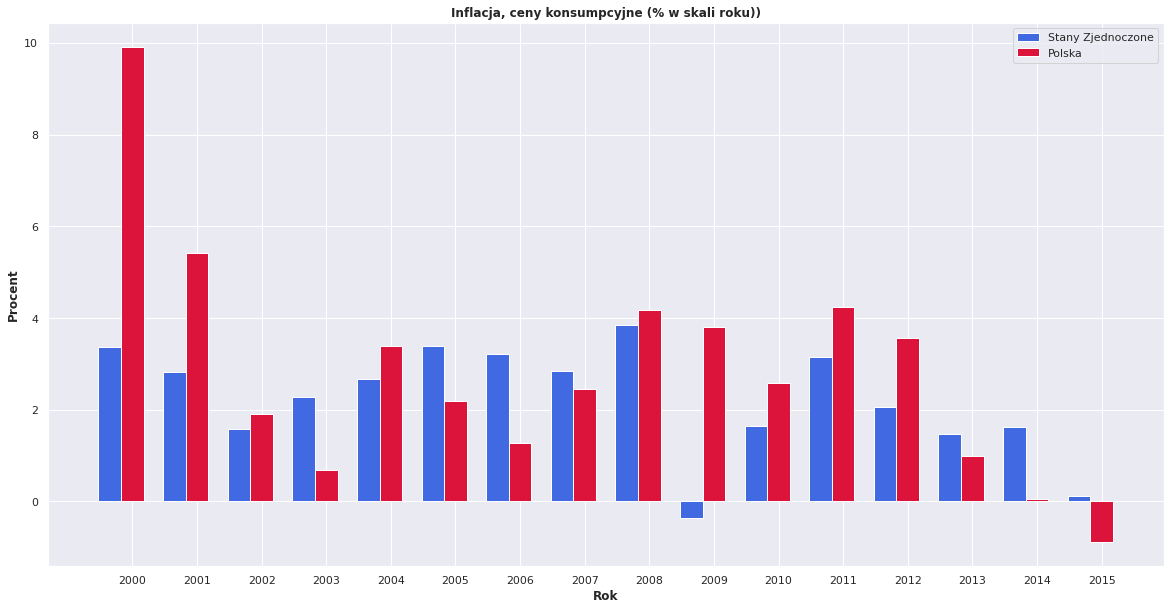

In [ ]:
#@title Slajd #4 Inflacja, ceny konsumpcyjne (% w skali roku)
indicator_3 = ['Inflation, consumer prices (annual %)']
years_inf =  years[10:]  #należało skrócić horyzont danych, ponieważ zaburzały widoczność wykresu (przed 2000r. Polska miała bardzo wysoką inflację)
 


lineplot_3_data = usa_country_y.loc[usa_country_y['Year'].isin(years_inf) & usa_country_y['Indicator Name'].isin(indicator_3)]
lineplot_3_data_pl = pl_country_y.loc[usa_country_y['Year'].isin(years_inf) & pl_country_y['Indicator Name'].isin(indicator_3)]

'''
lineplot_4 = sns.barplot(data = lineplot_4_data, x = 'Year', y = 'Value', color = 'y')
lineplot_4.set_title('Inflacja, ceny konsumpcyjne (% w skali roku)')

'''
barWidth = 0.35


bars_infl_1 = lineplot_3_data['Value']
bars_infl_2 = lineplot_3_data_pl['Value']

r1 = np.arange(len(bars_infl_1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars_infl_1, width = barWidth, color = 'royalblue', edgecolor = 'white', label = 'Stany Zjednoczone')
plt.bar(r2, bars_infl_2, width = barWidth, color = 'crimson', edgecolor = 'white', label = 'Polska')


plt.xlabel('Rok', fontweight = 'bold')
plt.ylabel("Procent", fontweight = 'bold')
plt.title('Inflacja, ceny konsumpcyjne (% w skali roku))', fontweight = 'bold')
plt.xticks([r + barWidth for r in range(len(bars_infl_1))], years_inf)

plt.legend()
plt.show()

Dla wskaźnika **Inflacja, ceny konsumpcyjne (% w skali roku)**  możemy zaobserwować pewną anomalię. W roku 2009, Stany Zjednoczone osiągnęły ujemną inflację (deflację).

Prawdodpobonie był to wyniki interwencjonizmu państwa, w cełu załagodzenia skutków kryzysu finansowego.

W przypadku Polski, nie jesteśmy w stanie stwierdzić żadnego wpływu kryzysu gospodarczego 2007 - 2009 na gospodarkę państwa. 






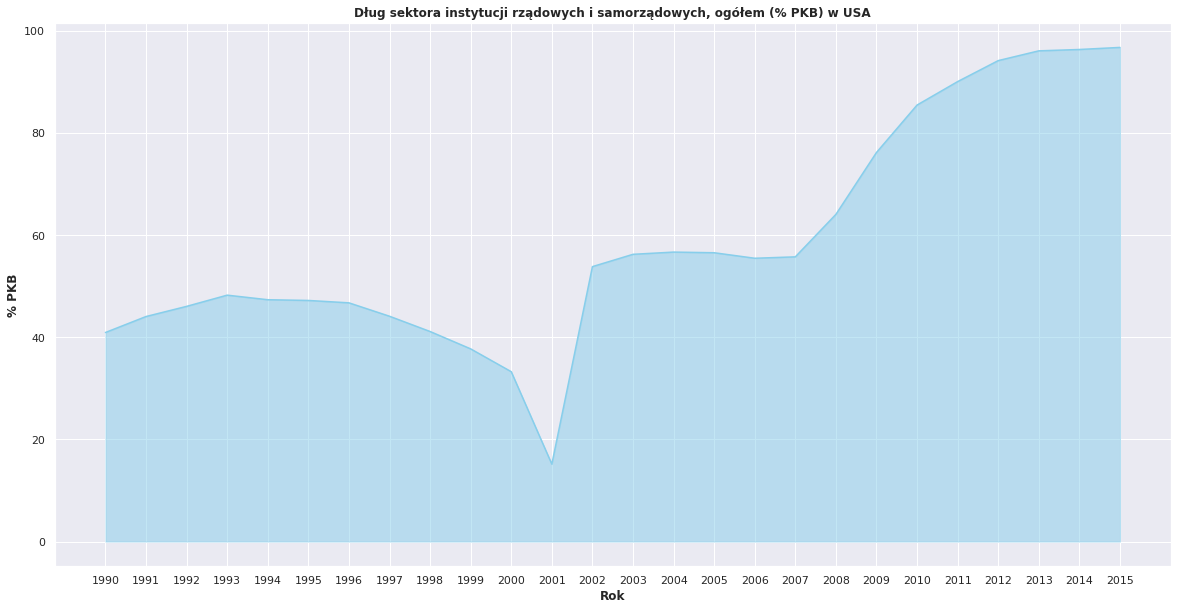

In [ ]:
#@title Slajd #5 Dług sektora instytucji rządowych i samorządowych, ogółem (% PKB)
#w związku z brakiem danych dla Polski, możemy stworzyć wykres tylko dla USA
indicator_5 = ['Central government debt, total (% of GDP)']
lineplot_5_data = usa_country_y.loc[usa_country_y['Year'].isin(years) & usa_country_y['Indicator Name'].isin(indicator_5)]
lineplot_5_data_pl = pl_country_y.loc[usa_country_y['Year'].isin(years) & pl_country_y['Indicator Name'].isin(indicator_5)]


lineplot_5 = sns.lineplot(data = lineplot_5_data, x = 'Year', y = 'Value', color = 'skyblue')
lineplot_5_pl = sns.lineplot(data = lineplot_5_data_pl, x = 'Year', y = 'Value', color = 'skyblue')

lineplot_5.set_xticks(years)

plt.fill_between(years, lineplot_5_data['Value'], color = 'Skyblue', alpha = 0.5)

plt.ylabel("% PKB", fontweight = 'bold')
plt.xlabel("Rok", fontweight = 'bold')
plt.title('Dług sektora instytucji rządowych i samorządowych, ogółem (% PKB) w USA', fontweight = 'bold')
plt.show()

Dla Stanów Zjednoczonych możemy zaobserwować wzrost długu sektora rządowego, począwszy od 2009 roku do 2013.

Jest to skutek kryzysu finansowego, ponieważ państwo w tym czasie gwałtownie zwiększyło nakłady finansowe na powstrzymanie skutków kryzysu, przez co byli zmuszeni do zapożyczenia większej ilości pieniędzy.

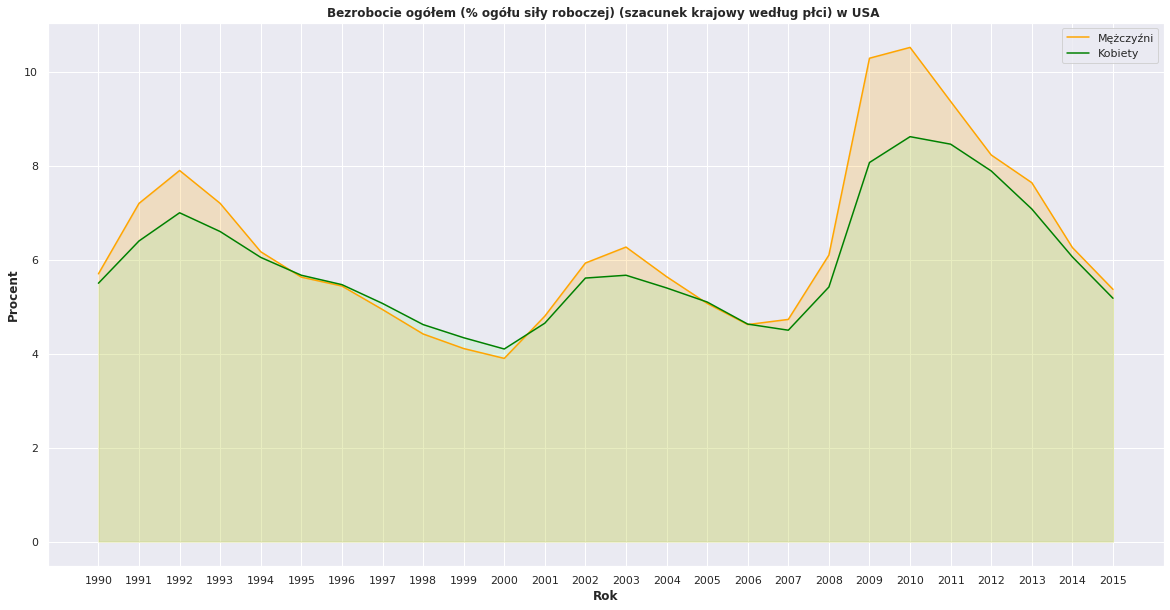

In [ ]:
#@title Slajd #6  Bezrobocie ogółem (% ogółu siły roboczej) (szacunek krajowy według płci)
unemp_plot_ind = ['Unemployment, total (% of total labor force) (national estimate)']
unemp_plot_ind_male = ['Unemployment, male (% of male labor force) (national estimate)']
unemp_plot_ind_female = ['Unemployment, female (% of female labor force) (national estimate)']
unemp_data= usa_country_y.loc[usa_country_y['Year'].isin(years) & usa_country_y['Indicator Name'].isin(unemp_plot_ind)]
unemp_data_male= usa_country_y.loc[usa_country_y['Year'].isin(years) & usa_country_y['Indicator Name'].isin(unemp_plot_ind_male)]
unemp_data_female= usa_country_y.loc[usa_country_y['Year'].isin(years) & usa_country_y['Indicator Name'].isin(unemp_plot_ind_female)]

male = unemp_data_male[['Value', 'Year']] 
female = unemp_data_female[['Value', 'Year']] 
time = male['Year']

male_grb = male.groupby(['Year'], as_index = False).mean()
female_grb = female.groupby(['Year'], as_index = False).mean()

male = male_grb['Value']
female = female_grb['Value']


plt.fill_between(years, male, 0, color = 'orange', alpha = 0.2)
plt.fill_between(years, female, 0, color = 'lightgreen', alpha = 0.2)
chart = sns.lineplot(data = male_grb, x = 'Year', y = 'Value', color = 'orange', markers=True, label = 'Mężczyźni')
chart = sns.lineplot(data = female_grb, x = 'Year', y = 'Value', color = 'green', markers=True, label = 'Kobiety')
chart.set_xticks(years)
plt.ylabel("Procent", fontweight = 'bold')
plt.xlabel("Rok", fontweight = 'bold')
plt.title('Bezrobocie ogółem (% ogółu siły roboczej) (szacunek krajowy według płci) w USA ', fontweight = 'bold')


plt.legend()
plt.show()

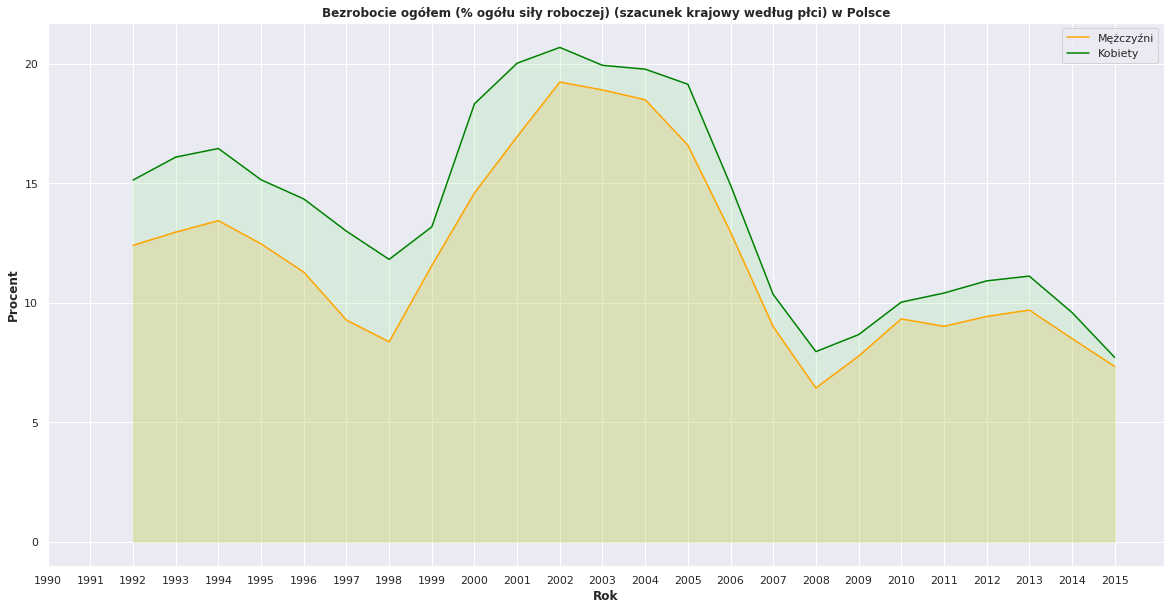

In [ ]:
#@title #
unemp_plot_ind = ['Unemployment, total (% of total labor force) (national estimate)']
unemp_plot_ind_male = ['Unemployment, male (% of male labor force) (national estimate)']
unemp_plot_ind_female = ['Unemployment, female (% of female labor force) (national estimate)']

unemp_data_pl= pl_country_y.loc[pl_country_y['Year'].isin(years) & pl_country_y['Indicator Name'].isin(unemp_plot_ind)]
unemp_data_male_pl = pl_country_y.loc[pl_country_y['Year'].isin(years) & pl_country_y['Indicator Name'].isin(unemp_plot_ind_male)]
unemp_data_female_pl = pl_country_y.loc[pl_country_y['Year'].isin(years) & pl_country_y['Indicator Name'].isin(unemp_plot_ind_female)]

male_pl = unemp_data_male_pl[['Value', 'Year']] 
female_pl = unemp_data_female_pl[['Value', 'Year']] 
time = male_pl['Year']

male_grb_pl = male_pl.groupby(['Year'], as_index = False).mean()
female_grb_pl = female_pl.groupby(['Year'], as_index = False).mean()

male_pl = male_grb_pl['Value']
female_pl = female_grb_pl['Value']


plt.fill_between(years, male_pl, 0, color = 'orange', alpha = 0.2)
plt.fill_between(years, female_pl, 0, color = 'lightgreen', alpha = 0.2)
chart = sns.lineplot(data = male_grb_pl, x = 'Year', y = 'Value', color = 'orange', markers=True, label = 'Mężczyźni')
chart = sns.lineplot(data = female_grb_pl, x = 'Year', y = 'Value', color = 'green', markers=True, label = 'Kobiety')
chart.set_xticks(years)
plt.ylabel("Procent", fontweight = 'bold')
plt.xlabel("Rok", fontweight = 'bold')
plt.title('Bezrobocie ogółem (% ogółu siły roboczej) (szacunek krajowy według płci) w Polsce', fontweight = 'bold')


plt.legend()
plt.show()

W kontekście bezrobocia możemy zauważyć negatywne oddziaływanie kryzysu finansowego 2007 - 2009 na Stany Zjedonczone.

W 2009 roku, możemy zaobserwować że około 10% mężczyzn i 8% kobiet było bezrobotnych, wynika to prawdopodbnie z licznych likwidacji firm i działaności gospodarczych w tym okresie (głównie branża finansowa).

Pomijając kwestię kryzysu, możemy zaobserwować rożnicę w procencie bezrobocia w zależności od płci (w Polsce dużo więcej kobiet nie miało pracy). Może to wynikać z uwarunkowań społecznych tradycyjnego modelu rodziny, gdzie mężczyzna powinien pracować, a kobieta zajmować się domem.

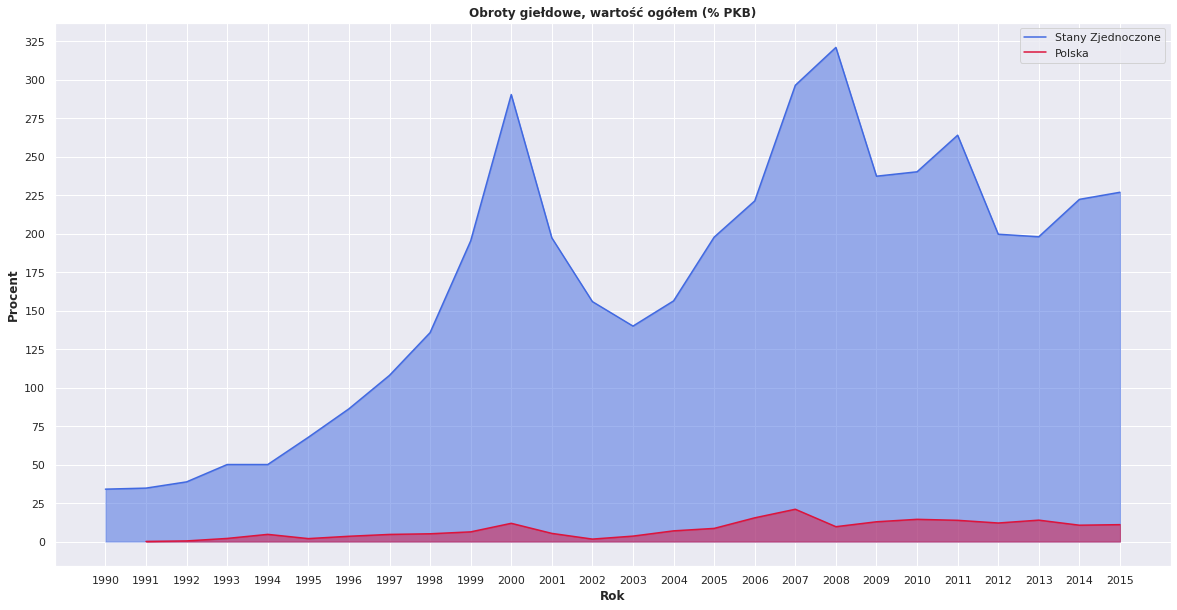

In [ ]:
#@title Slajd #7 Obroty giełdowe, wartość ogółem (% PKB)
stocks_ind = ['Stocks traded, total value (% of GDP)']
lineplot_9_data= usa_country_y.loc[usa_country_y['Year'].isin(years) & usa_country_y['Indicator Name'].isin(stocks_ind)]
lineplot_9_data_pl = pl_country_y.loc[usa_country_y['Year'].isin(years) & pl_country_y['Indicator Name'].isin(stocks_ind)]

lineplot_8 = sns.lineplot(data = lineplot_9_data, x = 'Year', y = 'Value', color = 'royalblue', label = 'Stany Zjednoczone')
lineplot_8 = sns.lineplot(data = lineplot_9_data_pl, x = 'Year', y = 'Value', color = 'crimson', label = 'Polska')


lineplot_8.set_yticks([0,25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350])
lineplot_8.set_xticks(years)

plt.ylabel("Procent", fontweight = 'bold')
plt.xlabel("Rok", fontweight = 'bold')
plt.title('Obroty giełdowe, wartość ogółem (% PKB)', fontweight = 'bold')

plt.fill_between(years, lineplot_9_data['Value'], color = 'royalblue', alpha = 0.5)
plt.fill_between(years, lineplot_9_data_pl['Value'], color = 'crimson', alpha = 0.5)


plt.legend()
plt.show()

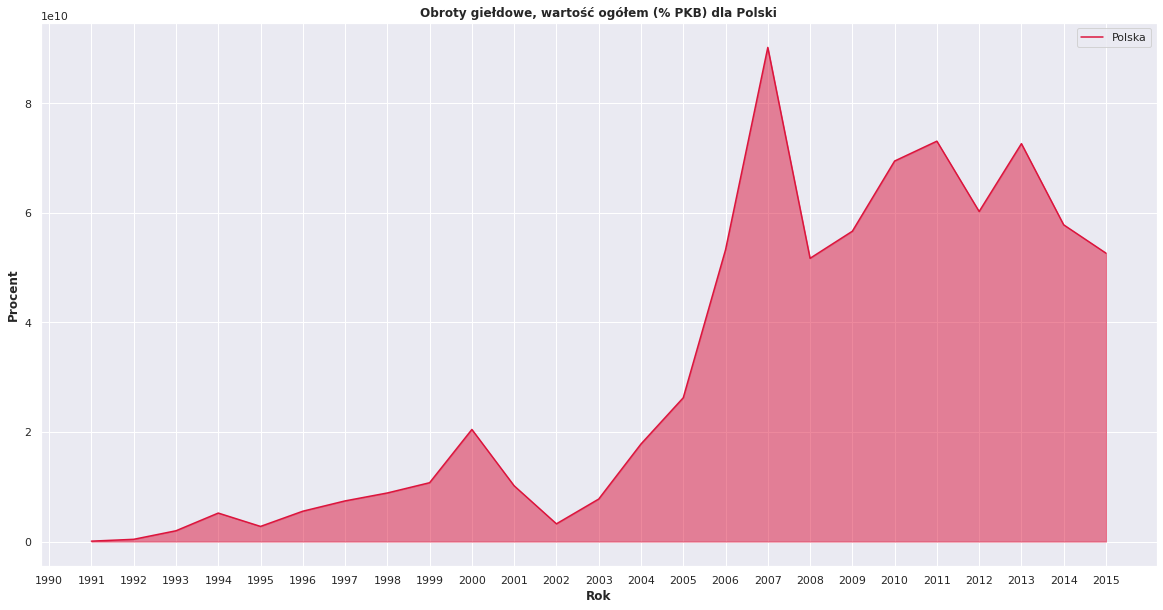

In [ ]:
#@title #
lineplot_8 = sns.lineplot(data = lineplot_8_data_pl, x = 'Year', y = 'Value', color = 'crimson', label = 'Polska')
lineplot_8.set_xticks(years)
plt.fill_between(years, lineplot_8_data_pl['Value'], color = 'crimson', alpha = 0.5)

plt.ylabel("Procent", fontweight = 'bold')
plt.xlabel("Rok", fontweight = 'bold')
plt.title('Obroty giełdowe, wartość ogółem (% PKB) dla Polski', fontweight = 'bold')

plt.legend()
plt.show()

W przypadku obrotów giełdowych, dla Stanów Zjednoczonych można zaobserwować negatywne skutki kryzysu,to znaczy spadki na wykresie począwszy od 2008 roku.

Dla Polski można zaobserwować spadek 10% z roku 2007 na rok 2008 co stanowi około 50% wszystkich obrotów giełdowych. W przeciwieństwie do Stanów Zjednoczonych, można później zaobserwować stopniowy wzrost dla obrotów giełdowych.

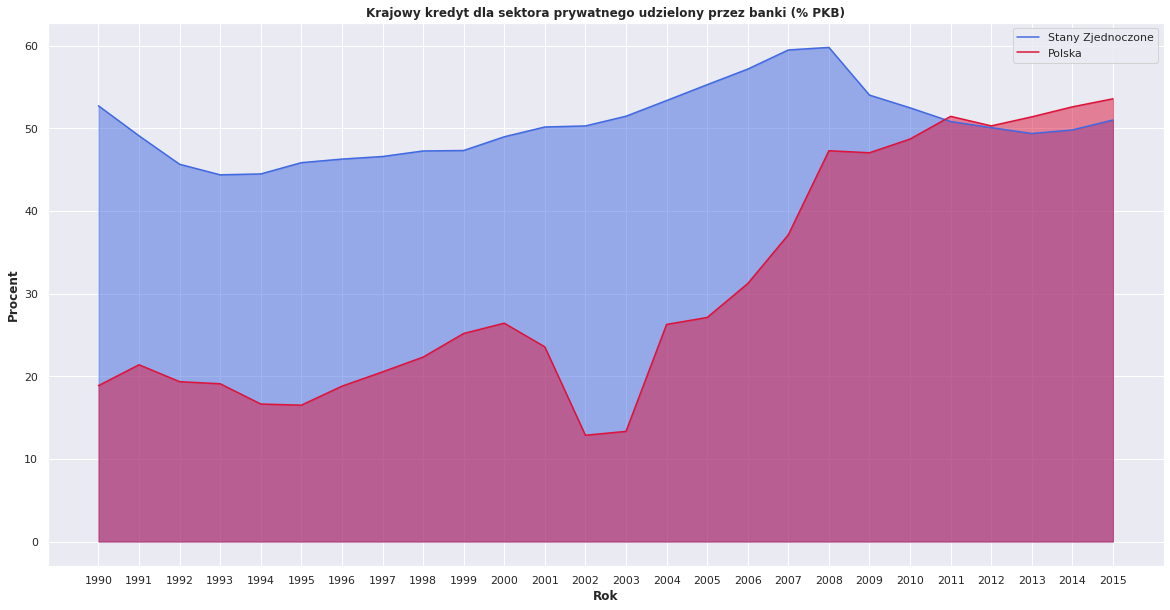

In [ ]:
#@title Slajd #8 Krajowy kredyt dla sektora prywatnego udzielony przez banki (% PKB)
loan_ind = ['Domestic credit to private sector by banks (% of GDP)']
lineplot_9_data= usa_country_y.loc[usa_country_y['Year'].isin(years) & usa_country_y['Indicator Name'].isin(loan_ind)]
lineplot_9_data_pl = pl_country_y.loc[usa_country_y['Year'].isin(years) & pl_country_y['Indicator Name'].isin(loan_ind)]

lineplot_9 = sns.lineplot(data = lineplot_9_data, x = 'Year', y = 'Value', color = 'royalblue', label = 'Stany Zjednoczone')
lineplot_9 = sns.lineplot(data = lineplot_9_data_pl, x = 'Year', y = 'Value', color = 'crimson', label = 'Polska')


#lineplot_9.set_yticks([0,25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350])
lineplot_9.set_xticks(years)

plt.ylabel("Procent", fontweight = 'bold')
plt.xlabel("Rok", fontweight = 'bold')
plt.title('Krajowy kredyt dla sektora prywatnego udzielony przez banki (% PKB)', fontweight = 'bold')

plt.fill_between(years, lineplot_9_data['Value'], color = 'royalblue', alpha = 0.5)
plt.fill_between(years, lineplot_9_data_pl['Value'], color = 'crimson', alpha = 0.5)


plt.legend()
plt.show()

W przypadku udzielania kredytu dla sektora prywatnego przez banki, możemy zauważyć, że w przypadku Stanów Zjednocznocznych kryzys finansowy spowodował spadek (5% w przeciągu pierwszego roku, najniższy pułap ~50% osiągnał w 2013 roku)

Dla Polski w tym okresie widać wzrost udzielanych krajowych kredytów przez banki, dzięki czemu można wnioskować że kryzys finansowy nie miał negatywnych skutków w tej perspektywie.

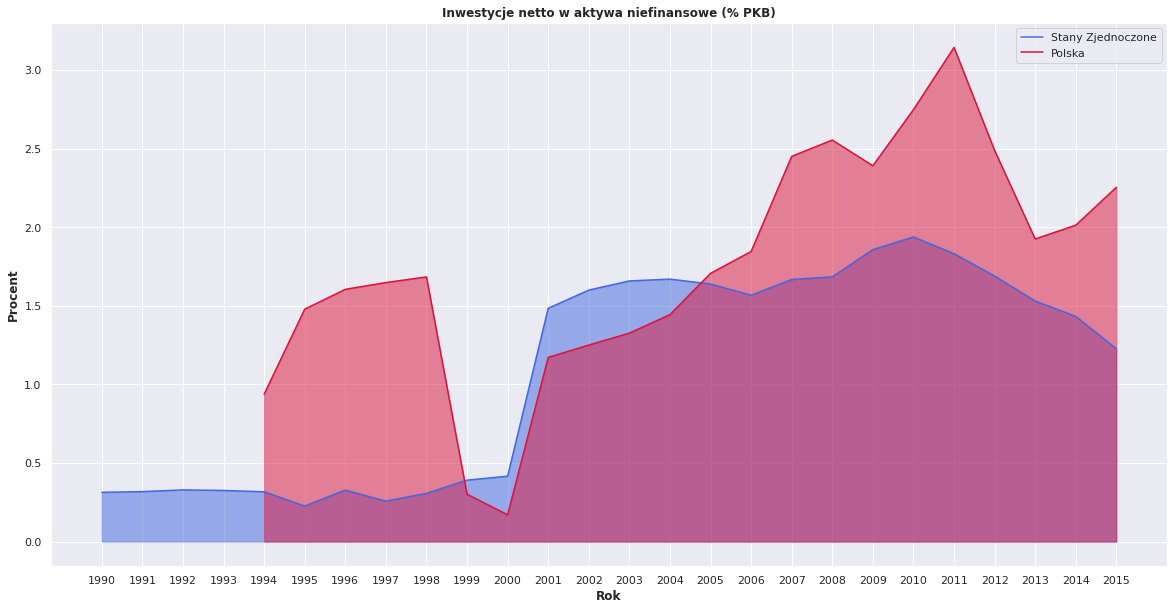

In [ ]:
#@title Slajd #9 Inwestycje netto w aktywa niefinansowe (% PKB)
ind_10 = ['Net investment in nonfinancial assets (% of GDP)']
lineplot_10_data= usa_country_y.loc[usa_country_y['Year'].isin(years) & usa_country_y['Indicator Name'].isin(ind_10)]
lineplot_10_data_pl = pl_country_y.loc[usa_country_y['Year'].isin(years) & pl_country_y['Indicator Name'].isin(ind_10)]

lineplot_10 = sns.lineplot(data = lineplot_10_data, x = 'Year', y = 'Value', color = 'royalblue', label = 'Stany Zjednoczone')
lineplot_10 = sns.lineplot(data = lineplot_10_data_pl, x = 'Year', y = 'Value', color = 'crimson', label = 'Polska')


#lineplot_10.set_yticks([0,25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350])
lineplot_10.set_xticks(years)

plt.ylabel("Procent", fontweight = 'bold')
plt.xlabel("Rok", fontweight = 'bold')
plt.title('Inwestycje netto w aktywa niefinansowe (% PKB)', fontweight = 'bold')

plt.fill_between(years, lineplot_10_data['Value'], color = 'royalblue', alpha = 0.5)
plt.fill_between(years, lineplot_10_data_pl['Value'], color = 'crimson', alpha = 0.5)


plt.legend()
plt.show()

Dla inwestycji netto w aktywa niefinansowe, nie jesteśmy w stanie zaobserwować konkretnych zmian w czasie, lub po kryzysie finansowym.
Dla Stanów Zjednoczonych widać tendencje spadkową od 2010 roku, natomiast w Polsce już od 2005 można zaobserwować tendencję wzrostową, aż do 2011 roku.

# Slajd #10 Podsumowanie

Na podstawie powyższych metryk, uważam że udało mi się poprzeć moją tezę. Reasumując, kryzys finansowy w Stanach Zjednoczonych 2007 - 2009, miał negatywne skutki dla Stanów Zjednoczonych, natomiast nie jesteśmy w stanie zaobserwować tej same zależności dla Polski.
